In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from   tensorflow import keras
from   keras import Sequential, layers
from   keras.layers import Dense
from   keras.datasets import mnist

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

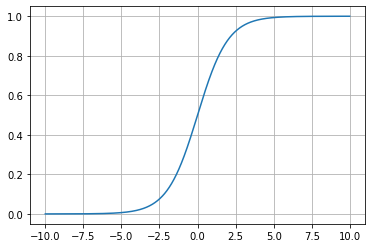

In [3]:
#Check sigmoid for random dataset
x = np.arange(-10,10,0.01)
y = sigmoid(x)

#plot the result
plt.plot(x,y)
plt.grid()

In [4]:
#in general sigmoid is applied to output of w*x+b
#given a q,x, and b, test the sigmoid
x = 100   #input feature value
w = 0.001 # Weight
b = 1     # Bias

new_x  = w*x+b
result = sigmoid(new_x) 
print (result)

0.7502601055951177


In [5]:
#Load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print ("train size: ", x_train.shape)
print ("test size: ", x_test.shape)

train size:  (60000, 28, 28)
test size:  (10000, 28, 28)


label of first sample is:  5


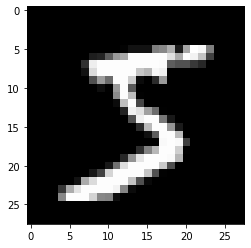

In [6]:
plt.imshow(x_train[0] , cmap='gray')
print ("label of first sample is: ", y_train[0])

In [7]:
#Since we are logistic regression, so we are working on binary classification problem
#Hence, select only the data of two classes

#Select only zeros and ones.
x_train_new, y_train_new = x_train[(y_train==0) | (y_train==1)], y_train[(y_train==0) | (y_train==1)]

#Do the same for the test set.
x_test_new, y_test_new   = x_test[(y_test==0) | (y_test==1)], y_test[(y_test==0) | (y_test==1)]

In [8]:
#New shape of train and test after selecting the values of only zeros, and ones labels
print("After:")
print(x_train_new.shape)
print(x_test_new.shape)

#Was 
print("\nBefore:")
print(x_train.shape)
print(x_test.shape)

After:
(12665, 28, 28)
(2115, 28, 28)

Before:
(60000, 28, 28)
(10000, 28, 28)


In [9]:
#REshape the input image to be in vector format: 28*28=784
x_train_new = x_train_new.reshape((-1, 784))
x_test_new  = x_test_new.reshape((-1, 784))

#Normalize the input train, and test by dividing on maximum value of pixels 255
x_train_new = x_train_new / 255
x_test_new  = x_test_new / 255

In [10]:
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(784,)) )

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 785       
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [11]:
#train the model
history = model.fit( x=x_train_new, y=y_train_new, shuffle=True, epochs=10, batch_size=16)

Epoch 1/10
792/792 [==============================] - 1s 1ms/step - loss: 0.0773 - binary_accuracy: 0.9908
Epoch 2/10
792/792 [==============================] - 2s 2ms/step - loss: 0.0215 - binary_accuracy: 0.9967
Epoch 3/10
792/792 [==============================] - 2s 2ms/step - loss: 0.0155 - binary_accuracy: 0.9974
Epoch 4/10
792/792 [==============================] - 2s 2ms/step - loss: 0.0128 - binary_accuracy: 0.9976
Epoch 5/10
792/792 [==============================] - 2s 3ms/step - loss: 0.0112 - binary_accuracy: 0.9978
Epoch 6/10
792/792 [==============================] - 2s 2ms/step - loss: 0.0101 - binary_accuracy: 0.9978
Epoch 7/10
792/792 [==============================] - 2s 3ms/step - loss: 0.0093 - binary_accuracy: 0.9979
Epoch 8/10
792/792 [==============================] - 2s 3ms/step - loss: 0.0086 - binary_accuracy: 0.9979
Epoch 9/10
792/792 [==============================] - 2s 3ms/step - loss: 0.0081 - binary_accuracy: 0.9980
Epoch 10/10
792/792 [================

In [12]:
#test the model using the predict method
model.predict(x_test_new)

array([[9.9649727e-01],
       [6.3753578e-05],
       [9.9937230e-01],
       ...,
       [9.9963880e-01],
       [3.5858154e-04],
       [9.9975401e-01]], dtype=float32)

In [13]:
#test the model using the evaluate method, and compare the result with actual labels: print the accuracy
score = model.evaluate(x_test_new,y_test_new)
print ("prediction error   : ", score[0])
print ("prediction accuracy: ", score[1])

67/67 [==============================] - 0s 1ms/step - loss: 0.0045 - binary_accuracy: 0.9991
prediction error   :  0.004490404389798641
prediction accuracy:  0.9990543723106384
